## Avaliação dos modelos criados

In [73]:
import seaborn as sns
import sklearn as skl
import joblib as jb
import pandas as pd
import os

In [74]:
models = [file for file in os.listdir(os.getcwd()) if file.endswith(".pkl")]

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [77]:
dataset = pd.read_csv("dataset_leo.csv")

In [84]:
X = dataset.drop(columns=["Jumping"])
y = dataset["Jumping"]

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2)

In [85]:
for model in models:
    svc = jb.load(model)
    print(svc.get_params())

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## Padrão:
- C = 1
- 'decision_functin_shape' = 'ovr'
- 'degree' = 3
- 'gamma' = 'scale'
- kernel = 'rbf'

In [87]:
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")

for model in models:
    print(model)
    svm = jb.load(model)
    prediction = svm.predict(X_test)

    print(classification_report(y_test, prediction))

model_second_iteration.pkl
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        14
           1       0.00      0.00      0.00        42

    accuracy                           0.25        56
   macro avg       0.12      0.50      0.20        56
weighted avg       0.06      0.25      0.10        56

svm_model_test_2.pkl
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        14
           1       0.00      0.00      0.00        42

    accuracy                           0.25        56
   macro avg       0.12      0.50      0.20        56
weighted avg       0.06      0.25      0.10        56



In [82]:
for model in models:
    print(model)
    svm = jb.load(model)
    print(svm.score(X_test, y_test))

model_second_iteration.pkl
0.23214285714285715
svm_model_test_2.pkl
0.23214285714285715


model_second_iteration.pkl


<Axes: >

svm_model_test_2.pkl


<Axes: >

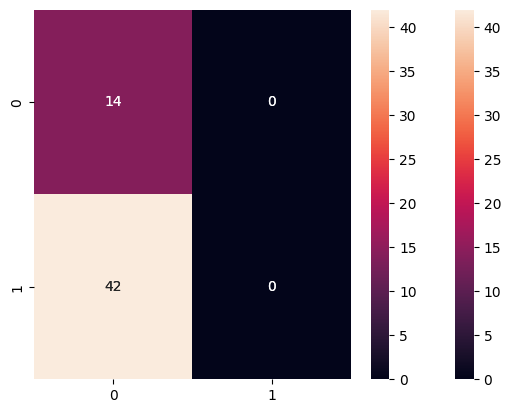

In [90]:
from sklearn.metrics import confusion_matrix

for model in models:
    print(model)
    svm = jb.load(model)

    prediction = svm.predict(X_test)

    cfm = confusion_matrix(y_test, prediction)

    display(sns.heatmap(cfm, annot=True, fmt='d'))

## Problemas:
- O modelo atual está com dificuldades de classificar imagens pulando.
- Há a necessidade de implementar um novo modelo, para que seja possível atuar sobre esses novos dados disponíveis.